**Cài đặt thư viện UnderTheSea để hỗ trợ tách từ trong tiếng Việt. Xem thêm các tính năng của thư viện tại: https://github.com/undertheseanlp/underthesea**

In [3]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached underthesea-1.4.0-py3-none-any.whl (11.0 MB)
  Using cached underthesea_core-0.0.5_alpha.2-cp38-cp38-manylinux2010_x86_64.whl (591 kB)
     |████████████████████████████████| 1.0 MB 5.2 MB/s 


**Import các thư viện cần thiết**

In [4]:
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from underthesea import word_tokenize

**Lấy dữ liệu các tài liệu/văn bản mẫu từ**: https://github.com/HUTECH-OpenCourseWare/IRS.git

In [5]:
!git clone https://github.com/HUTECH-OpenCourseWare/IRS.git

Cloning into 'IRS'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (271/271), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 271 (delta 0), reused 271 (delta 0), pack-reused 0
Receiving objects: 100% (271/271), 441.48 KiB | 7.88 MiB/s, done.


**Đọc dữ liệu các tài liệu/văn bản từ các files chứa trong folder "/content/IRS_Course/data/vnexpress/<chủ_đề>"**

In [6]:
topic = 'the-thao'
data_root_dir_path = '/content/IRS/data/vnexpress/{}'.format(topic)
lines = []
for file_name in os.listdir(data_root_dir_path):
  print('Đọc dữ liệu từ file: [{}]...'.format(file_name))
  file_path = os.path.join(data_root_dir_path, file_name)
  with open(file_path, 'r', encoding='utf-8') as f:
    # Đọc từng dòng trong file
    for line in f:
      # Chuyển đổi chuỗi về dạng chữ viết thường và xóa các khoảng trắng ở đầu/cuối mỗi dòng
      line = line.lower().strip()
      # Bỏ các dòng đọc được vào trong mảng lines
      lines.append(line)

# Nối các dòng riêng biệt trong mảng lines thành một tài liệu/văn bản hoàn chỉnh
text = " ".join(lines)

# Làm sạch văn bản - xóa các ký tự đặc biệt, dấu câu, v.v.
clean_text = re.sub('\W+',' ', text)

Đọc dữ liệu từ file: [liverpool-nhi-bang-tai-champions-league-4530835.txt]...
Đọc dữ liệu từ file: [cac-phuong-an-thay-quang-hai-o-aff-cup-4530113.txt]...
Đọc dữ liệu từ file: [su-that-thuong-cua-golfer-18-tuoi-lan-dau-du-pga-tour-4530793.txt]...
Đọc dữ liệu từ file: [tundra-esports-bo-tui-8-5-trieu-usd-khi-vo-dich-dota2-the-gioi-4530586.txt]...
Đọc dữ liệu từ file: [tottenham-vao-vong-1-8-champions-league-4530837.txt]...
Đọc dữ liệu từ file: [clb-huong-loi-neu-co-cau-thu-tien-sau-o-world-cup-2022-4530090.txt]...
Đọc dữ liệu từ file: [dien-bien-dao-chieu-lien-tuc-o-bang-d-champions-league-4530851.txt]...
Đọc dữ liệu từ file: [bayern-ba-lan-toan-thang-vong-bang-champions-league-4530836.txt]...
Đọc dữ liệu từ file: [ronaldo-mat-ngoi-vua-phong-tap-tai-man-utd-4530011.txt]...
Đọc dữ liệu từ file: [klopp-hay-danh-gia-liverpool-vao-cuoi-mua-4530373.txt]...
Đọc dữ liệu từ file: [golfer-nghiep-du-so-mot-viet-nam-danh-duoi-ky-vong-o-apac-4530323.txt]...
Đọc dữ liệu từ file: [cac-clb-tap-cuong-d

**Tiến hành lọc stopwords (làm tương tự như trong bài IRS_Bai03_StopwordRemoval)**

In [7]:
# Tiến hành download tập dữ liệu danh sách các stopwords tiếng Việt về
!wget https://raw.githubusercontent.com/HUTECH-OpenCourseWare/IRS/master/data/stopwords/vietnamese-stopwords.txt

# Tiến hành lọc các stopwords ra khỏi chuỗi tài liệu/văn bản [clean_text]
vn_stopwords_file_path = '/content/vietnamese-stopwords.txt'
stopwords = []
with open(vn_stopwords_file_path, 'r', encoding='utf-8') as f:
  for line in f:
    line = line.strip()
    stopwords.append(line)

clean_text_filtered_tokens = []
clean_text_tokens = clean_text.split(' ')

for token in clean_text_tokens:
  if token not in stopwords:
    clean_text_filtered_tokens.append(token)

clean_text = " ".join(clean_text_filtered_tokens)

--2022-12-13 02:56:33--  https://raw.githubusercontent.com/HUTECH-OpenCourseWare/IRS/master/data/stopwords/vietnamese-stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20470 (20K) [text/plain]
Saving to: ‘vietnamese-stopwords.txt’

vietnamese-stopword 100%[===================>]  19.99K  --.-KB/s    in 0.001s  

2022-12-13 02:56:33 (24.3 MB/s) - ‘vietnamese-stopwords.txt’ saved [20470/20470]



**Tiến hành dùng công cụ word_tokenize của thư viện UnderTheSea để tiến hành tách các từ ghép tiếng Việt trong chuỗi tài liệu/văn bản**

In [8]:
# Tiến hành tách từ/tokens (các từ ghép tiếng Việt) trong chuỗi tài liệu văn bản clean_text]
# Chúng ta sẽ nhận được một mảng các từ/token có dạng sau -> ['học sinh', 'sinh học', 'thầy trò',...]
clean_text_tokens = word_tokenize(clean_text)

# Tuy nhiên để có thể đảm bảo thư viện WordCloud có thể nhận diện được các từ/token ở dạng từ ghép này
# Chúng ta sẽ tiến hành thay thế khoảng trắng ' ' giữa các từ ghép trong tiếng Việt bằng '-'
clean_text_combined_tokens = [token.replace(' ', '_') for token in clean_text_tokens]

# Cuối cùng chúng ta nối lại các từ/tokens lại thành một chuỗi tài liệu/văn bản mới hoàn chỉnh
clean_text_vn = ' '.join(clean_text_combined_tokens)

**Cuối cùng, ta sẽ thử tiến hành trực quan hóa lại sự phân bố của các từ khóa trong chuỗi văn bản/tài liệu cũ [clean_text] và mới [clean_text_vn] bằng thư viện WordCloud**

Đám mây từ của chuỗi tài liệu/văn bản: [clean_text]


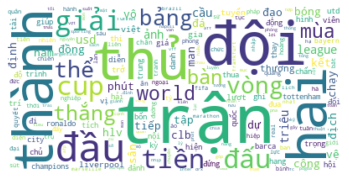

Đám mây từ của chuỗi tài liệu/văn bản: [clean_text_vn]


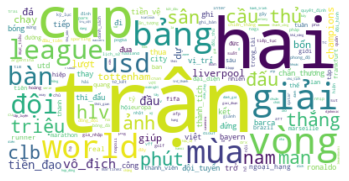

In [9]:
# Xây dựng thống kê đám mây từ bằng thư viện (WordCloud) cho [clean_text] và [clean_text_vn]
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(clean_text)
word_cloud_vn = WordCloud(collocations = False, background_color = 'white').generate(clean_text_vn)

# Hiển thị đám mây từ đã được tạo bằng thư viện matplotlib [clean_text]
print('Đám mây từ của chuỗi tài liệu/văn bản: [clean_text]')
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Hiển thị đám mây từ đã được tạo bằng thư viện matplotlib [clean_text_vn]
print('Đám mây từ của chuỗi tài liệu/văn bản: [clean_text_vn]')
plt.imshow(word_cloud_vn, interpolation='bilinear')
plt.axis("off")
plt.show()